Przykład 0

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

dataset = pd.read_csv('/content/drive/My Drive/Dane/label_to_num.csv', header=0)
print(dataset)
label_encoder = LabelEncoder()
dataset['Wakacje'] = label_encoder.fit_transform(dataset['Wakacje'])
print(dataset)

FileNotFoundError: ignored

Przykład 1

In [3]:
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data
y = iris.target
clf = tree.DecisionTreeClassifier() # definicja klasyfikatora
scores = cross_val_score(clf, X, y, cv=5) # walidacja krzyżowa
print('Accuracy (mean): ', scores.mean())

Accuracy (mean):  0.9666666666666668


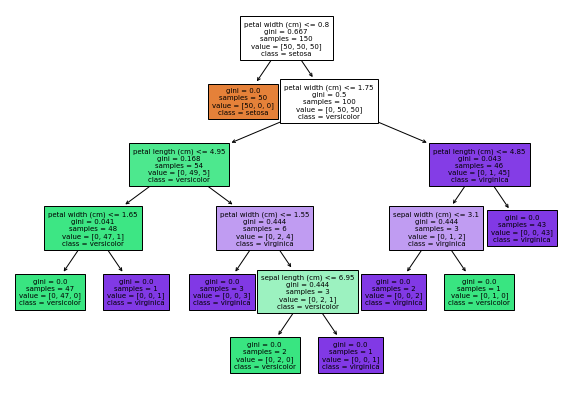

In [4]:
clf = clf.fit(X, y) # uczenie klasyfikatora
plt.figure(figsize=(10,7)) #odpowiednio dopasować: figsize, fontsize
tree.plot_tree(clf, fontsize=7, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.savefig('DTiris.png')
plt.show()

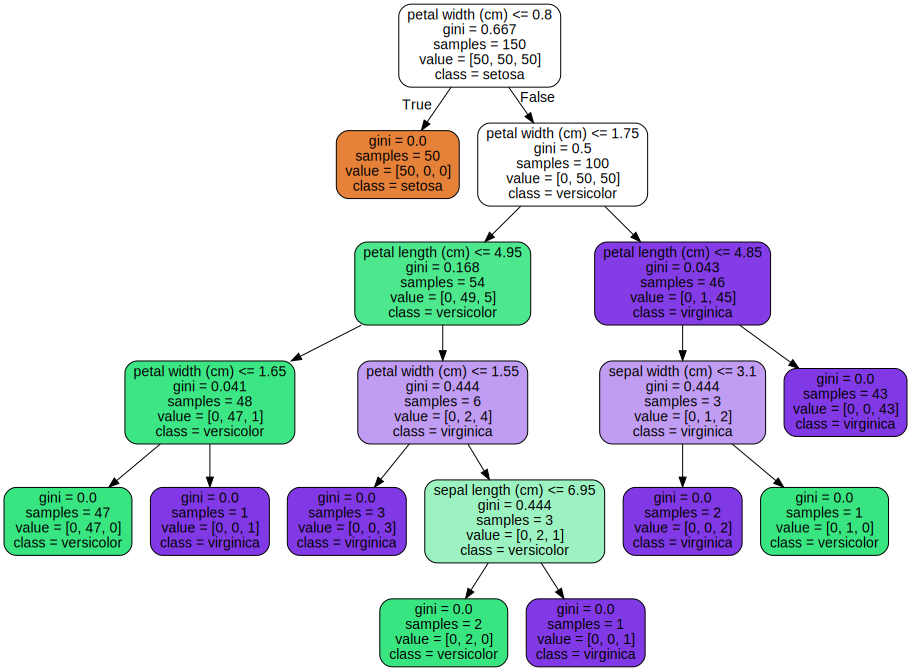

In [5]:
import graphviz
# wyświetlenie drzewa decyzyjnego (model dla wszystkich przypadków)
dot_data = tree.export_graphviz(clf,feature_names=iris.feature_names,class_names=iris.target_names,filled=True, rounded=True)
graph = graphviz.Source(dot_data, format= "pdf")
graph.render("DTiris") # zapis do pliku DTiris.pdf
graph

Przykład 2

In [44]:
%matplotlib inline
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree

# Krótkie nazwy cech (wygodne przy wyświetlaniu drzewa)
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv('/content/drive/My Drive/Dane/diabetes.csv', header=0, names=col_names)
print(pima.head())

   pregnant  glucose  bp  skin  insulin   bmi  pedigree  age  label
0         6      148  72    35        0  33.6     0.627   50      1
1         1       85  66    29        0  26.6     0.351   31      0
2         8      183  64     0        0  23.3     0.672   32      1
3         1       89  66    23       94  28.1     0.167   21      0
4         0      137  40    35      168  43.1     2.288   33      1


In [45]:
X = pima.values[:, 0:8] # cechy
y = pima.label # zmienna zależna
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% train, 30% test

In [48]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth = 5, min_samples_leaf=0.1, max_leaf_nodes=10) # obiekt klasyfikatora
clf = clf.fit(X_train,y_train) # trenowanie klasyfikatora
# weryfikacja dla zbioru treningowego i testowego
y_train_pred = clf.predict(X_train)
print("Accuracy (train):",metrics.accuracy_score(y_train,y_train_pred))
y_test_pred = clf.predict(X_test)
print("Accuracy (test):",metrics.accuracy_score(y_test, y_test_pred))

Accuracy (train): 0.7616387337057728
Accuracy (test): 0.7965367965367965


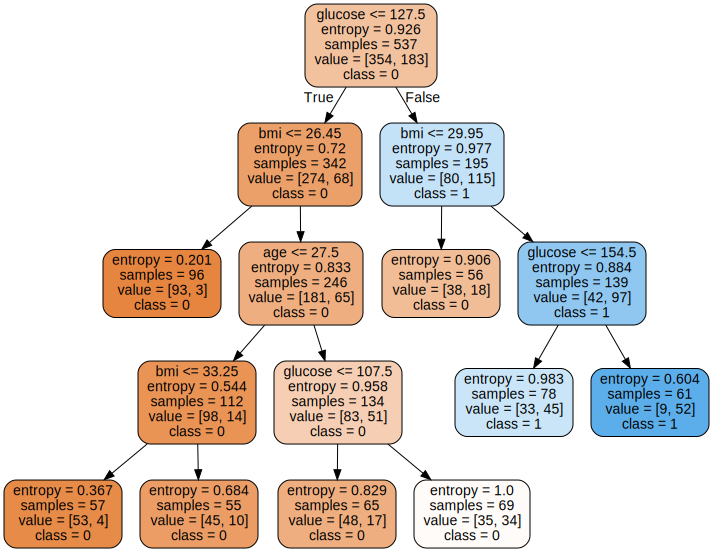

In [49]:
import graphviz
# wyświetlenie drzewa decyzyjnego (model dla wszystkich przypadków)
dot_data = tree.export_graphviz(clf,
                                feature_names=col_names[:-1],
                                class_names=['0','1'],
                                filled=True, rounded=True)

graph = graphviz.Source(dot_data, format='png')
graph.render('DTdiabetes') # do pliku DTdiabetes.png
graph

Przykład 3

In [50]:
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [51]:
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [52]:
# obiekt klasyfikatora – liczba drzew = 10
clf = RandomForestClassifier(n_estimators=10)
clf.fit(X_train, y_train) # trenowanie klasyfikatora
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
# dokładność dla zbioru testowego
print('Accuracy (train):', accuracy_score(y_train, y_train_pred))
print('Accuracy (test):', accuracy_score(y_test, y_test_pred))

Accuracy (train): 0.9910714285714286
Accuracy (test): 0.9736842105263158



Feature importances
sepal length (cm)    0.105897
sepal width (cm)     0.015969
petal length (cm)    0.481889
petal width (cm)     0.396245
dtype: float64


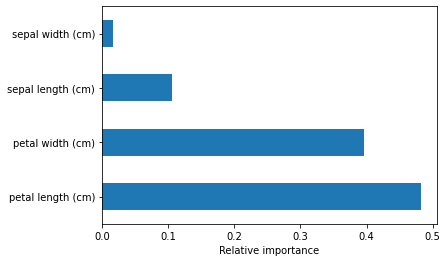

In [53]:
# Badanie istotności cech
print('\nFeature importances')
importances = pd.Series(clf.feature_importances_, index=df.columns)
print(importances)
importances.nlargest(4).plot(kind='barh')
plt.xlabel('Relative importance')
plt.show()

In [18]:
# Macierz pomyłek i raport z klasyfikacji
print(confusion_matrix(y_test,y_test_pred))
print(classification_report(y_test,y_test_pred))
print(accuracy_score(y_test, y_test_pred))

[[16  0  0]
 [ 0 11  2]
 [ 0  0  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.85      0.92        13
           2       0.82      1.00      0.90         9

    accuracy                           0.95        38
   macro avg       0.94      0.95      0.94        38
weighted avg       0.96      0.95      0.95        38

0.9473684210526315


Przykład 4

In [54]:
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

pima = pd.read_csv('/content/drive/My Drive/Dane/diabetes.csv')
print(pima.head())
X = pima.values[:, 0:8]
y = pima.values[:, 8]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [55]:
# RF, podział węzła jest wykonywany, gdy liczba próbek > 3, l.drzew = 10
clf = RandomForestClassifier(n_estimators=11, min_samples_leaf=5, max_depth=10, random_state=0)
clf = clf.fit(X_train,y_train) # trenowanie
y_test_pred = clf.predict(X_test) # predykcja dla zbioru testowego
print("Accuracy (test):", metrics.accuracy_score(y_test, y_test_pred))

Accuracy (test): 0.7748917748917749


In [56]:
# CV (cv=10), analiza AUC
score = cross_val_score(clf, X, y, cv=10, scoring='roc_auc')
print("Mean AUC score: ",score.mean())
print("Std AUC score: ",score.std())

Mean AUC score:  0.8093960113960114
Std AUC score:  0.05200012893236007


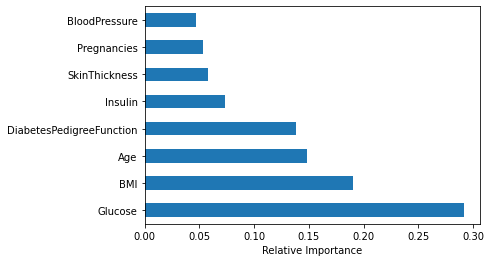

In [24]:
print('\n')
importances = pd.Series(clf.feature_importances_, index=pima.keys()[0:8])
importances.nlargest(8).plot(kind='barh')
plt.xlabel('Relative Importance')
plt.show()

Zadanie domowe

In [38]:
from sklearn.datasets import load_digits
digits = load_digits()

print(digits.target)

[0 1 2 ... 8 9 8]
